In [280]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [136]:
pip install scikit-learn-extra

     -------------------------------------- 346.2/346.2 kB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Задание 1

In [238]:
data = pd.read_csv("pluton.csv")

In [239]:
kmeans = KMeans(n_clusters=3, max_iter=1)
kmeans.fit(data)

C:\Users\semen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=1, n_clusters=3)

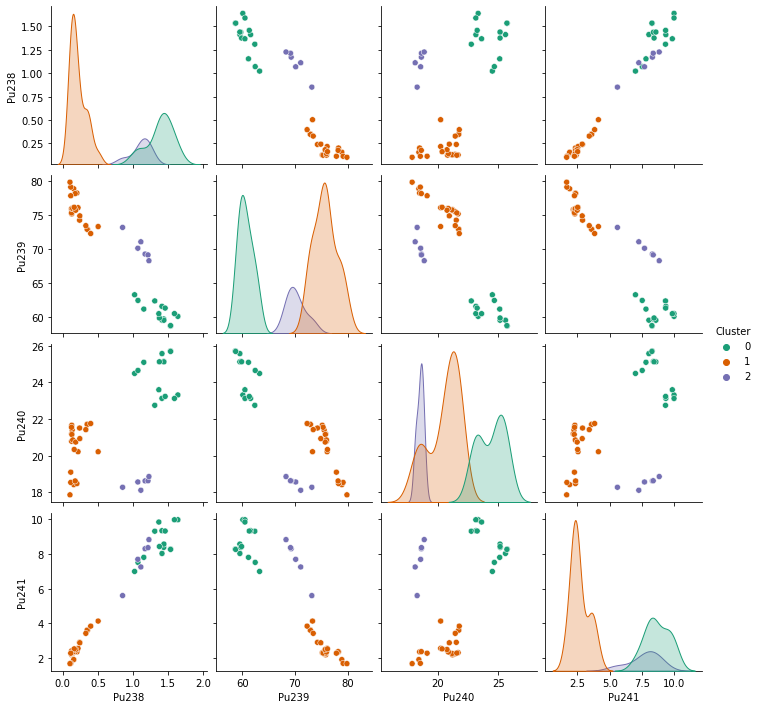

In [64]:
data['Cluster'] = kmeans.labels_
sns.pairplot(data, hue='Cluster', palette='Dark2')
plt.show()

In [65]:
kmeans = KMeans(n_clusters=3, max_iter=100)
kmeans.fit(data)

C:\Users\semen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=100, n_clusters=3)

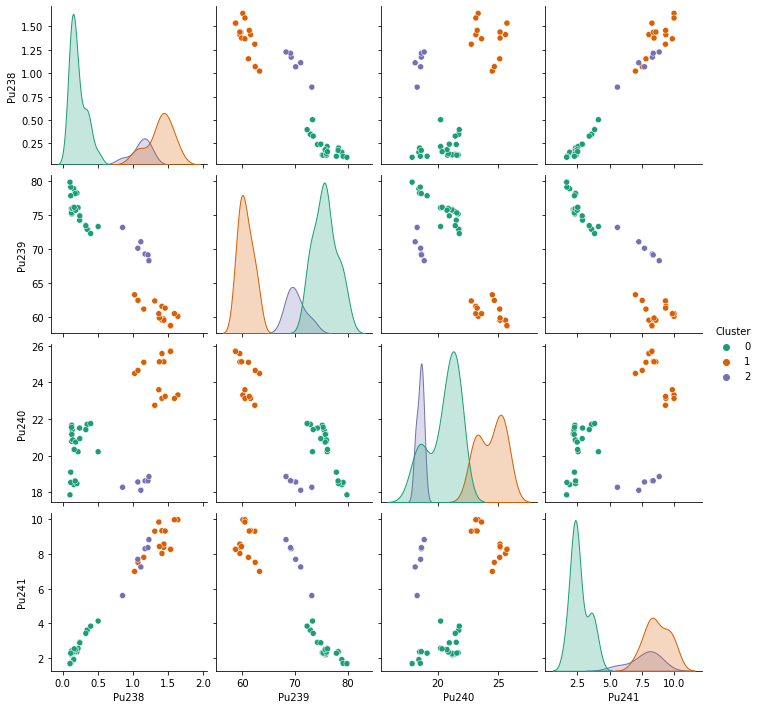

In [66]:
data['Cluster'] = kmeans.labels_
sns.pairplot(data, hue='Cluster', palette='Dark2')
plt.show()

### Данные хорошо разделяются как при первой, так и при сотой итерациях

# Задание 2 

In [137]:
from sklearn_extra.cluster import CLARA

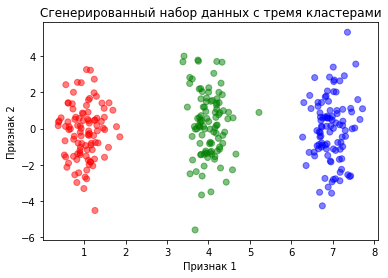

In [184]:
np.random.seed(42)
num_samples = 100
cluster1_params = {'mean': [1, 0], 'cov': [[0.1, 0], [0, 3]]}
cluster2_params = {'mean': [4, 0], 'cov': [[0.1, 0], [0, 3]]}
cluster3_params = {'mean': [7, 0], 'cov': [[0.1, 0], [0, 3]]}

cluster1 = np.random.multivariate_normal(**cluster1_params, size=num_samples)
cluster2 = np.random.multivariate_normal(**cluster2_params, size=num_samples)
cluster3 = np.random.multivariate_normal(**cluster3_params, size=num_samples)

data = np.vstack([cluster1, cluster2, cluster3])

labels = np.repeat([1, 2, 3], num_samples)
colors = {1: 'red', 2: 'green', 3: 'blue'}

plt.scatter(data[:, 0], data[:, 1], c=[colors[label] for label in labels], alpha=0.5)
plt.title('Сгенерированный набор данных с тремя кластерами')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

### Различные метрики

In [180]:
metrics = ['chebyshev', 'correlation', 'cosine', 'l1', 'l2']
labels = []
for metric in metrics:
    clara = CLARA(n_clusters=3, metric=metric)
    clara.fit(data)
    labels.append(clara.labels_)

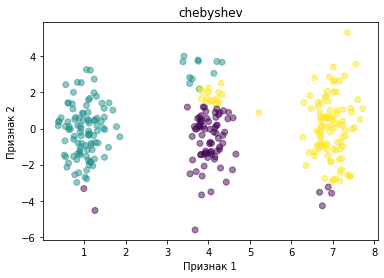

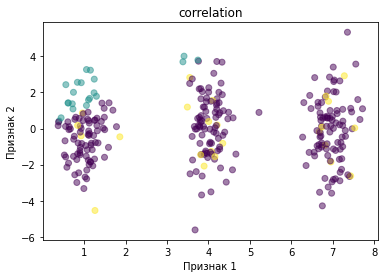

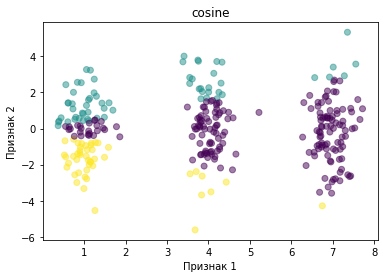

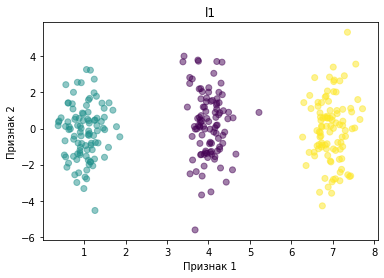

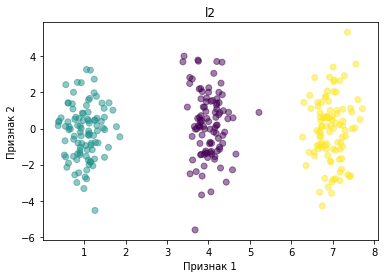

In [181]:
i=0
for label in labels:   
    plt.scatter(data[:, 0], data[:, 1], c=label, alpha=0.5)
    plt.title(metrics[i])
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.show()
    i = i+1

#### chebyshev - это максимальная абсолютная разность между координатами двух векторов, понятно, почему данная метрика не очень хорошо работает. Расстояния между кластерами такие же, как и расстояния максимальные внутри кластера по одной из осей.
#### correlation - это занятная метрика, фактически просто корреляция между двумя векторами. Она старалась объединить между собой максимально независимые величины.
#### cosine - косинусное расстроение. Если бы данные были вдоль прямых y=x, отработала бы лучше всех.
#### l1, l2 как и предполагалось, лучшие метрики для таких задач, отработали верно.

### Стандартизация

In [185]:
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)

standardized_data = (data - mean) / std

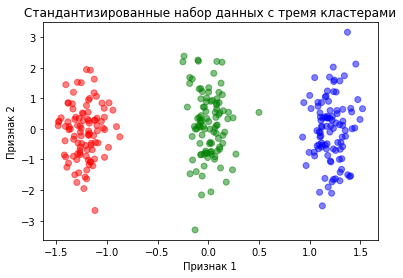

In [189]:
plt.scatter(standardized_data[:, 0], standardized_data[:, 1], c=[colors[label] for label in labels], alpha=0.5)
plt.title('Стандантизированные набор данных с тремя кластерами')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

In [215]:
metrics = ['chebyshev', 'correlation', 'cosine', 'l1', 'l2']
labels = []
for metric in metrics:
    clara = CLARA(n_clusters=3, metric=metric)
    clara.fit(standardized_data)
    labels.append(clara.labels_)

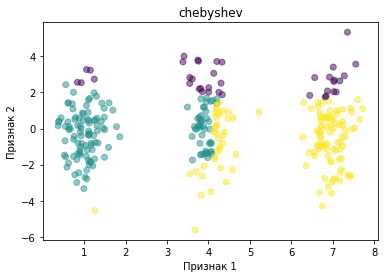

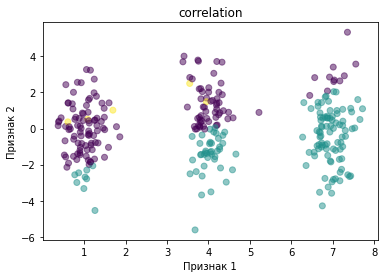

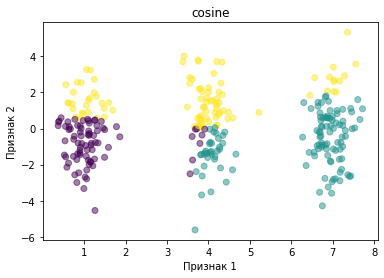

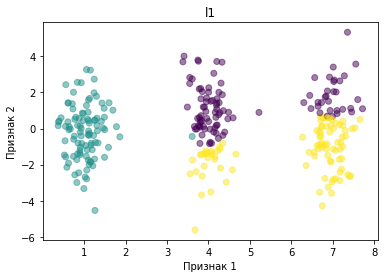

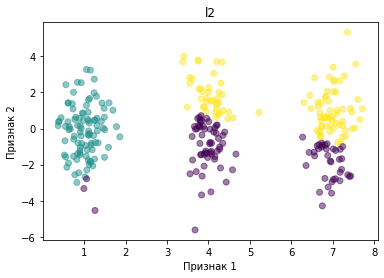

In [216]:
i=0
for label in labels:   
    plt.scatter(data[:, 0], data[:, 1], c=label, alpha=0.5)
    plt.title(metrics[i])
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.show()
    i = i+1

#### Стандартизация ухудшила результаты всех метрки.

# Задание 3

### Далее я буду добавлять дендограмму, полученную в R, так как дендограммы на Python строятся плохо, плюс в датасетах отсутствуют названия строк.

In [271]:
from scipy.cluster import hierarchy
import cv2

In [255]:
data = pd.read_csv("votes.repub.csv")
data = data.fillna(0)

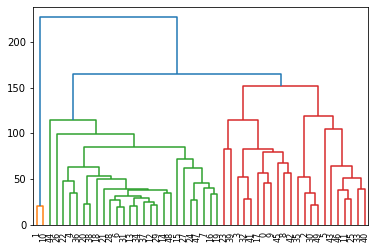

In [253]:
Z = hierarchy.linkage(data, 'average')
plt.figure()
dn = hierarchy.dendrogram(Z)

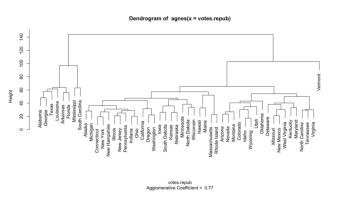

In [281]:
image_path = 'task3.jpg'

img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('off')
plt.show()

### Можно заметить, что объединяются в классы штаты с наименьшим количеством голосов и наибольшим. Возможно сильно влияет заполненные нулями пропуски, поэтому результат можно интерпретировать и как разделение по классам с наибольшим колличеством пропусков и наименьшим.

# Задание 4

In [256]:
data = pd.read_csv("animals.csv")
data = data.fillna(0)
data

,war,fly,ver,end,gro,hai
0,1,1,1,1.0,2.0,1
1,1,2,1,1.0,2.0,2
2,2,1,2,1.0,1.0,2
3,1,1,1,1.0,1.0,2
4,2,1,2,2.0,2.0,2
5,2,1,2,1.0,2.0,2
6,2,2,2,1.0,2.0,1
7,2,2,2,2.0,1.0,1
8,2,1,2,2.0,2.0,1
9,1,2,1,1.0,1.0,1


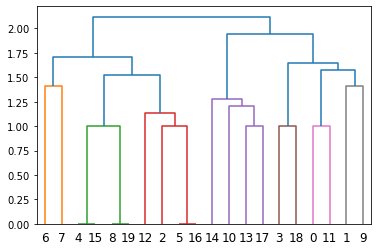

In [257]:
Z = hierarchy.linkage(data, 'average')
plt.figure()
dn = hierarchy.dendrogram(Z)

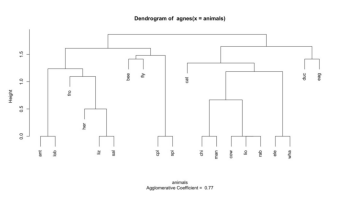

In [283]:
image_path = 'task4.jpg'

img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('off')
plt.show()

### Животные разделились на теплокровных и не теплокровных, также можно заметить, что объединение каждый раз логичное.

# Задание 5

In [267]:
data = pd.read_csv("seeds_dataset.txt", delimiter="\t")
data.drop(columns=["Класс"], inplace=True)
data

,Область,Периметр,Компактность,Длина зерна,Ширина,Ассиметрия,Длина колоска
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


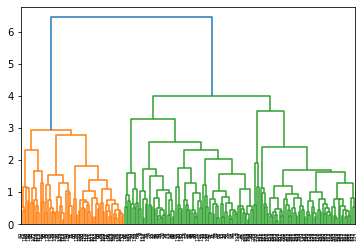

In [268]:
Z = hierarchy.linkage(data, 'average')
plt.figure()
dn = hierarchy.dendrogram(Z)

### Данные расположены так: слева первый вид, посередине второй вид, справа третий вид. Можно заметить, что примеры объединяются в соответствующий им вид. В самом конце объединяются второй и третий виды. Также стоит заметить, что я убрал из датасета столбец с номером вида.